In [22]:
!pip -q install "dvc[gdrive]"


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.2/78.2 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.8/438.8 kB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.8/41.8 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.0/45.0 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.0/210.0 kB 16.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.7/119.7 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.9/73.9 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 39.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 466.2/466.2 kB 18.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 375.5/375.5 kB 25.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.

In [24]:
%cd /content
!rm -rf Proyecto-MLOps
!git clone https://github.com/Copeliaminutti/Proyecto-MLOps.git
%cd Proyecto-MLOps
!git fetch origin feat/eda
!git checkout feat/eda
!git status


/content
Cloning into 'Proyecto-MLOps'...
remote: Enumerating objects: 143, done.
remote: Counting objects: 100% (143/143), done.
remote: Compressing objects: 100% (105/105), done.
remote: Total 143 (delta 38), reused 77 (delta 15), pack-reused 0 (from 0)
Receiving objects: 100% (143/143), 2.94 MiB | 9.81 MiB/s, done.
Resolving deltas: 100% (38/38), done.
/content/Proyecto-MLOps
From https://github.com/Copeliaminutti/Proyecto-MLOps
 * branch            feat/eda   -> FETCH_HEAD
Branch 'feat/eda' set up to track remote branch 'feat/eda' from 'origin'.
Switched to a new branch 'feat/eda'
On branch feat/eda
Your branch is up to date with 'origin/feat/eda'.

nothing to commit, working tree clean


In [25]:
!pip -q install "dvc[gdrive]"
!dvc --version


3.63.0


In [31]:
!git config user.name "Copelia Minutti"
!git config user.email "A01796921@tec.mx"

In [32]:
!git config --get user.name
!git config --get user.email

Copelia Minutti
A01796921@tec.mx


In [35]:
%cd /content
!rm -rf Proyecto-MLOps
!git clone https://github.com/Copeliaminutti/Proyecto-MLOps.git
%cd Proyecto-MLOps
!git fetch origin feat/eda
!git checkout feat/eda
!git status


/content
Cloning into 'Proyecto-MLOps'...
remote: Enumerating objects: 143, done.
remote: Counting objects: 100% (143/143), done.
remote: Compressing objects: 100% (105/105), done.
remote: Total 143 (delta 38), reused 77 (delta 15), pack-reused 0 (from 0)
Receiving objects: 100% (143/143), 2.94 MiB | 8.51 MiB/s, done.
Resolving deltas: 100% (38/38), done.
/content/Proyecto-MLOps
From https://github.com/Copeliaminutti/Proyecto-MLOps
 * branch            feat/eda   -> FETCH_HEAD
Branch 'feat/eda' set up to track remote branch 'feat/eda' from 'origin'.
Switched to a new branch 'feat/eda'
On branch feat/eda
Your branch is up to date with 'origin/feat/eda'.

nothing to commit, working tree clean


In [36]:
!git config user.name "Copelia Minutti"
!git config user.email "A01796921@tec.mx"

!pip -q install "dvc[gdrive]"
!dvc --version


3.63.0


# Limpieza de Datos – Steel Industry Energy Consumption
### Dataset: steel_energy_modified.csv

# **Limpieza de la información**

Partimos del archivo steel_energy_modified.csv y ejecutamos una limpieza reproducible para dejar un conjunto consistente y listo para análisis.

1. Estandarización de nombres y tipos
Normalizamos los nombres de columnas a snake_case (por ejemplo, Usage_KWh → usage_kwh, CO2(tCO2) → co2_tco2, WeekStatus → week_status).
Convertimos date a tipo datetime con formato dd/mm/yyyy HH:MM y tipificamos como float las variables numéricas (usage_kwh, reactiva lagging/leading, co2_tco2, factores de potencia y nsm).

2. Reconstrucción y consistencia de categóricas
Derivamos day_of_week a partir de la fecha y, con ello, week_status (Weekday/Weekend), garantizando coherencia entre ambas.
load_type se normalizó a los tres valores canónicos: Light_Load, Medium_Load y Maximum_Load. Los pocos casos irreconocibles se imputaron por moda del día de la semana, quedando sin nulos.

3. Filas sin fecha y duplicados temporales
Eliminamos 2,123 filas sin date y resolvimos 623 duplicados por timestamp (manteniendo la primera aparición). El conjunto pasó de 35,740 a 32,994 registros.
Para trabajos de series temporales, además generamos una versión con grilla continua de 15 minutos (2018 completo), con 35,040 filas.

4. Recomputación de nsm
Recalculamos nsm como segundos desde medianoche y lo forzamos a múltiplos de 900 (15 minutos). Tras la corrección, no quedaron valores fuera de rango ni residuales.

5. Reglas físicas y limpieza

    * Forzamos no negatividad en consumo, reactiva y CO₂ (valores anómalos a NA).

    * Factores de potencia acotados a [0, 100] (eran porcentajes y había outliers enormes por errores de origen).

    * Se detectó y corrigió la “columna mixta”: la separamos en mixed_type_col_num (parte numérica) y mixed_type_col_label (etiquetas como “unknown”, “bad”). Esto preserva la señal sin mezclar tipos.

6. Imputación de faltantes (jerárquica)
Para numéricas, seguimos una jerarquía (load_type, day_of_week) → day_of_week → mediana global, minimizando sesgos.
En co2_tco2 aprovechamos la relación física con el consumo (co2/usage) para imputar primero con un factor de emisión mediano y completar luego con la misma jerarquía.

7. Control de outliers
Aplicamos capping por IQR a usage_kwh, reactiva y co2_tco2. El efecto fue moderado y esperable: por ejemplo, el p99 de usage_kwh pasó de 143.65 a 125.19, y el p99 de co2_tco2 de 0.06 a 0.05 (un recorte suave de cola).

8. QA posterior a la limpieza: no quedaron negativos; nsm dentro de [0, 86,400) y múltiplo de 900; factores de potencia todos en [0,100]; y el factor de emisión resultante es estable (mediana ≈ 0.00046 t/kWh, ~0.46 kg CO₂/kWh).

In [2]:
from google.colab import files

uploaded = files.upload()

for filename in uploaded.keys():
    print(f"Archivo cargado: {filename}")


Saving steel_energy_modified.csv to steel_energy_modified.csv
Archivo cargado: steel_energy_modified.csv


In [3]:
import pandas as pd
import numpy as np

PATH = "steel_energy_modified.csv"
NA = ["", " ", "nan", "NaN", "NAN", "null", "NULL", "N/A", "NA"]

df = pd.read_csv(
    PATH,
    na_values=NA,
    keep_default_na=True,
    parse_dates=["date"],
    dayfirst=True,
    infer_datetime_format=True,
    # decimal=","
    encoding="utf-8-sig"
)

print("Shape:", df.shape)
print("Dtypes:\n", df.dtypes)
df.head()


/tmp/ipython-input-2524166532.py:7: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df = pd.read_csv(


Shape: (35740, 12)
Dtypes:
 date                                    object
Usage_kWh                               object
Lagging_Current_Reactive.Power_kVarh    object
Leading_Current_Reactive_Power_kVarh    object
CO2(tCO2)                               object
Lagging_Current_Power_Factor            object
Leading_Current_Power_Factor            object
NSM                                     object
WeekStatus                              object
Day_of_week                             object
Load_Type                               object
mixed_type_col                          object
dtype: object


,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type,mixed_type_col
0,01/01/2018 00:15,3.17,2.95,0.0,NaN,73.21,100.0,900.0,Weekday,Monday,Light_Load,649
1,01/01/2018 00:30,4.0,4.46,0.0,0.0,66.77,100.0,1800.0,Weekday,Monday,Light_Load,NaN
2,01/01/2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700.0,Weekday,Monday,Light_Load,696
3,01/01/2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600.0,Weekday,Monday,Light_Load,630
4,01/01/2018 01:15,3.82,4.5,0.0,0.0,64.72,100.0,4500.0,Weekday,Monday,Light_Load,325


In [4]:
import re, unicodedata

def normalize_colname(name: str) -> str:
    s = unicodedata.normalize("NFKD", str(name)).encode("ascii", "ignore").decode()  # quita acentos
    s = re.sub(r"([a-z0-9])([A-Z])", r"\1_\2", s)  # separa CamelCase -> WeekStatus -> Week_Status
    s = s.strip().lower()
    s = re.sub(r"[^\w]+", "_", s)                  # cualquier separador (., (), espacios, - , /) -> _
    s = re.sub(r"__+", "_", s).strip("_")
    return s

# Construye el mapping
colmap = {c: normalize_colname(c) for c in df.columns}
seen = {}
new_cols = []
for c in df.columns:
    nc = colmap[c]
    if nc in seen:
        seen[nc] += 1
        nc = f"{nc}_{seen[nc]}"
    else:
        seen[nc] = 0
    new_cols.append(nc)

print("Renombrado (original -> nuevo):")
for old, new in zip(df.columns, new_cols):
    print(f"  {old} -> {new}")

df.columns = new_cols


Renombrado (original -> nuevo):
  date -> date
  Usage_kWh -> usage_k_wh
  Lagging_Current_Reactive.Power_kVarh -> lagging_current_reactive_power_k_varh
  Leading_Current_Reactive_Power_kVarh -> leading_current_reactive_power_k_varh
  CO2(tCO2) -> co2_t_co2
  Lagging_Current_Power_Factor -> lagging_current_power_factor
  Leading_Current_Power_Factor -> leading_current_power_factor
  NSM -> nsm
  WeekStatus -> week_status
  Day_of_week -> day_of_week
  Load_Type -> load_type
  mixed_type_col -> mixed_type_col


In [6]:
# --- AJUSTES POST NORMALIZACIÓN ---

# Fuerza el formato correcto de la fecha
df["date"] = pd.to_datetime(df["date"], format="%d/%m/%Y %H:%M", errors="coerce")

# Corregigue nombres que quedaron con separaciones no correctas
rename_fix = {
    "usage_k_wh": "usage_kwh",
    "co2_t_co2": "co2_tco2",
    "lagging_current_reactive_power_k_varh": "lagging_current_reactive_power_kvarh",
    "leading_current_reactive_power_k_varh": "leading_current_reactive_power_kvarh",
}
df.rename(columns=rename_fix, inplace=True)

# Convertierte columnas numéricas a float (para que dejen de ser object)
num_cols = [
    "usage_kwh",
    "lagging_current_reactive_power_kvarh",
    "leading_current_reactive_power_kvarh",
    "co2_tco2",
    "lagging_current_power_factor",
    "leading_current_power_factor",
    "nsm",
]

for c in num_cols:
    df[c] = pd.to_numeric(df[c], errors="coerce")

# Chequeo todo Ok
print(df.dtypes)
df.head(3)


date                                    datetime64[ns]
usage_kwh                                      float64
lagging_current_reactive_power_kvarh           float64
leading_current_reactive_power_kvarh           float64
co2_tco2                                       float64
lagging_current_power_factor                   float64
leading_current_power_factor                   float64
nsm                                            float64
week_status                                     object
day_of_week                                     object
load_type                                       object
mixed_type_col                                  object
dtype: object


,date,usage_kwh,lagging_current_reactive_power_kvarh,leading_current_reactive_power_kvarh,co2_tco2,lagging_current_power_factor,leading_current_power_factor,nsm,week_status,day_of_week,load_type,mixed_type_col
0,2018-01-01 00:15:00,3.17,2.95,0.0,NaN,73.21,100.0,900.0,Weekday,Monday,Light_Load,649
1,2018-01-01 00:30:00,4.00,4.46,0.0,0.0,66.77,100.0,1800.0,Weekday,Monday,Light_Load,NaN
2,2018-01-01 00:45:00,3.24,3.28,0.0,0.0,70.28,100.0,2700.0,Weekday,Monday,Light_Load,696


In [7]:
# Estrategia para duplicados
DUP_STRATEGY = "first"
OUTPUT_PATH = "steel_energy_clean.csv"

# Partimos del df que ya esta en la memoria
df_clean = df.copy()

rename_fix = {
    "usage_k_wh": "usage_kwh",
    "co2_t_co2": "co2_tco2",
    "lagging_current_reactive_power_k_varh": "lagging_current_reactive_power_kvarh",
    "leading_current_reactive_power_k_varh": "leading_current_reactive_power_kvarh",
}
df_clean.rename(columns={k:v for k,v in rename_fix.items() if k in df_clean.columns}, inplace=True)

# 1) Limpiando Categóricas
# ==========
# day_of_week: planteamos el formato completo
df_clean["day_of_week_raw"] = df_clean.get("day_of_week", pd.Series(index=df_clean.index, dtype="string"))
df_clean["day_of_week"] = df_clean["date"].dt.day_name().astype("string")

# week_status: con base al día de la semana
def _week_from_day(d):
    if pd.isna(d):
        return pd.NA
    return "Weekend" if d in ("Saturday","Sunday") else "Weekday"

df_clean["week_status_raw"] = df_clean.get("week_status", pd.Series(index=df_clean.index, dtype="string"))
df_clean["week_status"] = df_clean["day_of_week"].map(_week_from_day).astype("string")

# load_type: normalizar variantes a los tres valores que encontramos en el dataset
def _norm_load_type(x):
    if pd.isna(x):
        return pd.NA
    s = str(x).strip().upper().replace(" ", "").replace("-", "_")
    s = s.replace("__","_")
    # tolerar variantes: incluyendo cuando estan en mayusculas o sus variantes
    if "LIGHT" in s:
        return "Light_Load"
    if "MEDIUM" in s:
        return "Medium_Load"
    if "MAX" in s:
        return "Maximum_Load"
    # si no reconoce, dejar NA, por el momento más abajo los ajustamos
    return pd.NA

df_clean["load_type_raw"] = df_clean.get("load_type", pd.Series(index=df_clean.index, dtype="string"))
df_clean["load_type"] = df_clean["load_type_raw"].map(_norm_load_type).astype("string")

# Cast ordenado por categorías
dow_order = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
df_clean["day_of_week"] = pd.Categorical(df_clean["day_of_week"], categories=dow_order, ordered=True)
df_clean["week_status"] = pd.Categorical(df_clean["week_status"], categories=["Weekday","Weekend"], ordered=True)
df_clean["load_type"]   = pd.Categorical(df_clean["load_type"],   categories=["Light_Load","Medium_Load","Maximum_Load"], ordered=True)


# 2) Filas sin fecha y duplicados por timestamp
# ==========
n0 = len(df_clean)
n_na_date = int(df_clean["date"].isna().sum())
df_clean = df_clean.loc[df_clean["date"].notna()].copy()

# Duplicados por timestamp: mantener la primera
df_clean = df_clean.sort_values("date")
if DUP_STRATEGY == "first":
    n_dups = int(df_clean.duplicated(subset=["date"], keep="first").sum())
    df_clean = df_clean.drop_duplicates(subset=["date"], keep="first")
else:
    # Acá la media para numéricas y la modo para categóricas
    num_cols = df_clean.select_dtypes(include=[np.number]).columns.tolist()
    cat_cols = df_clean.select_dtypes(exclude=[np.number, "datetime64[ns]"]).columns.tolist()
    agg = {**{c: "mean" for c in num_cols}, **{c: "first" for c in cat_cols}}
    n_dups = int(df_clean.duplicated(subset=["date"], keep=False).sum())
    df_clean = df_clean.groupby("date", as_index=False).agg(agg)


# 3) NSM (segundos desde medianoche) coherente con 'date'
# ==========
nsm_calc = df_clean["date"].dt.hour * 3600 + df_clean["date"].dt.minute * 60 + df_clean["date"].dt.second
# Se redondea a múltiplos de 900 (15 min), por si hay segundos sueltos
df_clean["nsm"] = ((nsm_calc / 900).round() * 900).astype("Int64")


# 4) Fixeamos las columnas numéricas
# ==========
num_cols_base = [
    "usage_kwh",
    "lagging_current_reactive_power_kvarh",
    "leading_current_reactive_power_kvarh",
    "co2_tco2",
    "lagging_current_power_factor",
    "leading_current_power_factor",
    "nsm",
]
for c in num_cols_base:
    if c in df_clean.columns:
        df_clean[c] = pd.to_numeric(df_clean[c], errors="coerce")

# Sin negatios para energías y CO2
for c in ["usage_kwh","lagging_current_reactive_power_kvarh","leading_current_reactive_power_kvarh","co2_tco2"]:
    if c in df_clean.columns:
        df_clean.loc[df_clean[c] < 0, c] = np.nan

# Factores de potencia en [0, 100]
for c in ["lagging_current_power_factor","leading_current_power_factor"]:
    if c in df_clean.columns:
        df_clean.loc[(df_clean[c] < 0) | (df_clean[c] > 100), c] = np.nan


# 5) Imputación de faltantes (jerárquica)
# ==========
def impute_numeric_col(df_, col):
    if col not in df_.columns:
        return df_
    s = df_[col]
    if s.isna().sum() == 0:
        return df_
    # Jerarquía: (load_type, day_of_week) -> day_of_week -> global median
    med1 = df_.groupby(["load_type","day_of_week"], observed=True)[col].transform("median")
    med2 = df_.groupby(["day_of_week"], observed=True)[col].transform("median")
    medg = s.median()
    df_[col] = s.fillna(med1).fillna(med2).fillna(medg)
    return df_

# Imputar CO2 aprovechando factor de emisión ~ mediana(co2/usage) cuando usage > 0
if "co2_tco2" in df_clean.columns and "usage_kwh" in df_clean.columns:
    mask_pair = (df_clean["co2_tco2"] > 0) & (df_clean["usage_kwh"] > 0)
    if mask_pair.any():
        emission_factor = (df_clean.loc[mask_pair, "co2_tco2"] / df_clean.loc[mask_pair, "usage_kwh"]).median()
        mask_impute = df_clean["co2_tco2"].isna() & df_clean["usage_kwh"].notna()
        df_clean.loc[mask_impute, "co2_tco2"] = df_clean.loc[mask_impute, "usage_kwh"] * emission_factor

# Imputaciones para todas las numéricas relevantes
for col in ["usage_kwh",
            "lagging_current_reactive_power_kvarh",
            "leading_current_reactive_power_kvarh",
            "co2_tco2",
            "lagging_current_power_factor",
            "leading_current_power_factor"]:
    df_clean = impute_numeric_col(df_clean, col)


# 6) Capping de outliers (IQR) en variables con cola pesada
# ==========
def iqr_cap(s, k=1.5):
    q1 = s.quantile(0.25)
    q3 = s.quantile(0.75)
    iqr = q3 - q1
    low = q1 - k*iqr
    high = q3 + k*iqr
    return s.clip(lower=low, upper=high)

for c in ["usage_kwh", "lagging_current_reactive_power_kvarh", "leading_current_reactive_power_kvarh", "co2_tco2"]:
    if c in df_clean.columns:
        df_clean[c] = iqr_cap(df_clean[c])


# 7) Columna mixta por si existen: separamos parte numérica y etiqueta
# ==========
if "mixed_type_col" in df_clean.columns:
    num_parsed = pd.to_numeric(df_clean["mixed_type_col"], errors="coerce")
    df_clean["mixed_type_col_num"] = num_parsed
    df_clean["mixed_type_col_label"] = df_clean["mixed_type_col"].where(num_parsed.isna(), other=pd.NA).astype("string")


# 8) Resumen y guardado
# ==========
n1 = len(df_clean)
print("Filas originales:", n0)
print("Filas sin fecha eliminadas:", n_na_date)
print("Duplicados por timestamp removidos:", n_dups)
print("Filas finales:", n1)
print("Faltantes por columna (top 10):")
print(df_clean.isna().sum().sort_values(ascending=False).head(10))

df_clean.to_csv(OUTPUT_PATH, index=False)
print(f"Dataset limpio guardado en: {OUTPUT_PATH}")


Filas originales: 35740
Filas sin fecha eliminadas: 2123
Duplicados por timestamp removidos: 623
Filas finales: 32994
Faltantes por columna (top 10):
mixed_type_col_label    26350
mixed_type_col_num       9825
mixed_type_col           3181
week_status_raw           307
load_type                 290
day_of_week_raw           286
load_type_raw             275
date                        0
usage_kwh                   0
week_status                 0
dtype: int64
Dataset limpio guardado en: steel_energy_clean.csv


In [8]:
# ===== El QA =====

df_q = df_clean.copy()

# 1) Continuidad 15-min
idx_full = pd.date_range(df_q["date"].min().floor("15min"),
                         df_q["date"].max().ceil("15min"),
                         freq="15min")
missing_slots = idx_full.difference(pd.DatetimeIndex(df_q["date"]))
print("Slots esperados (min..max, 15’):", len(idx_full))
print("Slots faltantes:", len(missing_slots))

# 2) NSM en rango y múltiplos de 900
nsm_bad_range = ((df_q["nsm"] < 0) | (df_q["nsm"] >= 86400)).sum()
nsm_not_multiple = (df_q["nsm"].dropna() % 900 != 0).sum()
print("NSM fuera de [0,86400):", int(nsm_bad_range))
print("NSM no múltiplo de 900:", int(nsm_not_multiple))

# 3) Reglas físicas
for c in ["usage_kwh","lagging_current_reactive_power_kvarh",
          "leading_current_reactive_power_kvarh","co2_tco2"]:
    neg = (df_q[c] < 0).sum()
    print(f"{c}: negativos = {int(neg)}")

for c in ["lagging_current_power_factor","leading_current_power_factor"]:
    out = ((df_q[c] < 0) | (df_q[c] > 100)).sum()
    print(f"{c}: fuera de [0,100] = {int(out)}")

# 4) Factor de emisión CO2/kWh
mask = (df_q["usage_kwh"] > 0) & (df_q["co2_tco2"] > 0)
if mask.any():
    ratio = (df_q.loc[mask, "co2_tco2"] / df_q.loc[mask, "usage_kwh"])
    print("Factor de emisión CO2/kWh (t/kWh) - quantiles:",
          ratio.quantile([.1,.5,.9]).to_dict())
else:
    print("Sin pares válidos para ratio CO2/Usage.")


Slots esperados (min..max, 15’): 35040
Slots faltantes: 2046
NSM fuera de [0,86400): 0
NSM no múltiplo de 900: 0
usage_kwh: negativos = 0
lagging_current_reactive_power_kvarh: negativos = 0
leading_current_reactive_power_kvarh: negativos = 0
co2_tco2: negativos = 0
lagging_current_power_factor: fuera de [0,100] = 0
leading_current_power_factor: fuera de [0,100] = 0
Factor de emisión CO2/kWh (t/kWh) - quantiles: {0.1: 0.00037893141341417203, 0.5: 0.00046144617328656995, 0.9: 0.0005435767349157456}


In [9]:
# === FULL GRID 15' + imputación ===
df_full = df_clean.set_index("date").sort_index()

idx_full = pd.date_range(df_full.index.min().floor("15min"),
                         df_full.index.max().ceil("15min"),
                         freq="15min")
df_full = df_full.reindex(idx_full)
df_full.index.name = "date"

# Recalcular day_of_week, week_status, NSM
df_full["day_of_week"] = pd.Series(df_full.index.day_name(), index=df_full.index, dtype="string")
df_full["week_status"] = df_full["day_of_week"].map(lambda d: "Weekend" if d in ("Saturday","Sunday") else "Weekday").astype("string")
df_full["nsm"] = (((df_full.index.hour*3600 + df_full.index.minute*60)/900).round()*900).astype("Int64")

# Imputar load_type dentro de cada día (ffill/bfill diario)
df_full["load_type"] = df_full.groupby(pd.Grouper(freq="D"))["load_type"].ffill().bfill()

# Imputación jerárquica numéricas
def impute_numeric_col(df_, col):
    s = df_[col]
    med1 = df_.groupby(["load_type","day_of_week"], observed=True)[col].transform("median")
    med2 = df_.groupby(["day_of_week"], observed=True)[col].transform("median")
    medg = s.median()
    return s.fillna(med1).fillna(med2).fillna(medg)

for col in ["usage_kwh","lagging_current_reactive_power_kvarh","leading_current_reactive_power_kvarh",
            "co2_tco2","lagging_current_power_factor","leading_current_power_factor"]:
    df_full[col] = impute_numeric_col(df_full, col)

df_full = df_full.reset_index().rename(columns={"index":"date"})
df_full.to_csv("steel_energy_clean_fullgrid.csv", index=False)
print("Full grid guardado:", "steel_energy_clean_fullgrid.csv", " | filas:", len(df_full))


Full grid guardado: steel_energy_clean_fullgrid.csv  | filas: 35040


In [10]:
# === Limpieza de NA pendientes ===
mode_by_dow = (
    df_clean.dropna(subset=["load_type"])
            .groupby("day_of_week", observed=True)["load_type"]
            .agg(lambda x: x.mode().iat[0] if not x.mode().empty else pd.NA)
)
df_clean.loc[df_clean["load_type"].isna(), "load_type"] = df_clean.loc[df_clean["load_type"].isna(), "day_of_week"].map(mode_by_dow)
print("load_type nulos restantes:", df_clean["load_type"].isna().sum())


load_type nulos restantes: 0


In [11]:
# === Testing de la Data ===
for c in ["usage_kwh","co2_tco2"]:
    print(c, "pre/post p99:",
          df[c].quantile(0.99), "->",
          (df_full if 'df_full' in globals() else df_clean)[c].quantile(0.99))


usage_kwh pre/post p99: 143.64889999999818 -> 125.19
co2_tco2 pre/post p99: 0.06 -> 0.05


Media kWh por hora:
 hour
0      8.56
1      7.24
2      5.26
3      5.16
4      5.68
5      4.99
6      5.42
7      5.39
8     35.99
9     56.11
10    55.57
11    56.44
12    20.56
13    40.05
14    55.40
15    55.16
16    55.10
17    44.39
18    33.91
19    38.44
20    37.64
21    16.46
22    12.02
23     9.44
Name: usage_kwh, dtype: float64

Media kWh por día de semana:
 day_of_week
Friday       33.74
Monday       33.94
Saturday     16.43
Sunday        8.38
Thursday     35.38
Tuesday      34.85
Wednesday    32.70
Name: usage_kwh, dtype: float64

Media kWh por tipo de carga:
 load_type
Light_Load       9.27
Medium_Load     39.12
Maximum_Load    59.41
Name: usage_kwh, dtype: float64

Top correlaciones con usage_kwh:
usage_kwh                               1.000000
co2_tco2                                0.850983
lagging_current_reactive_power_kvarh    0.628743
lagging_current_power_factor            0.385787
nsm                                     0.328112
leading_current_power_factor

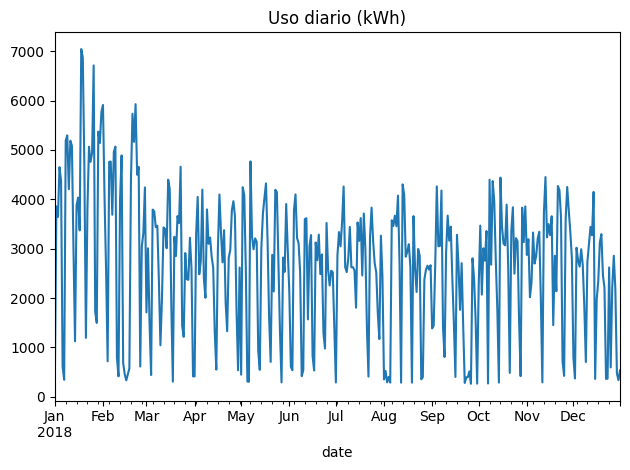

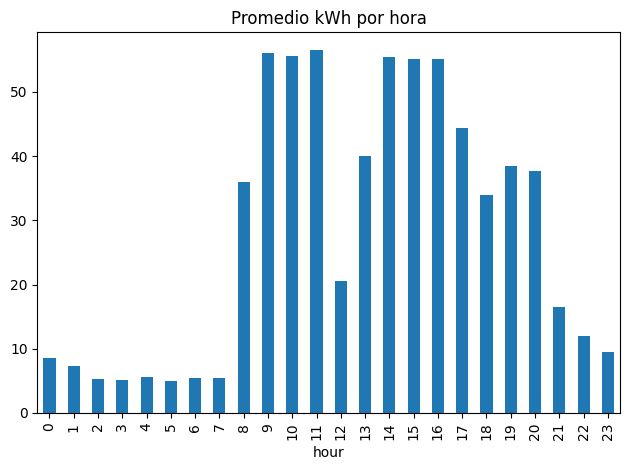

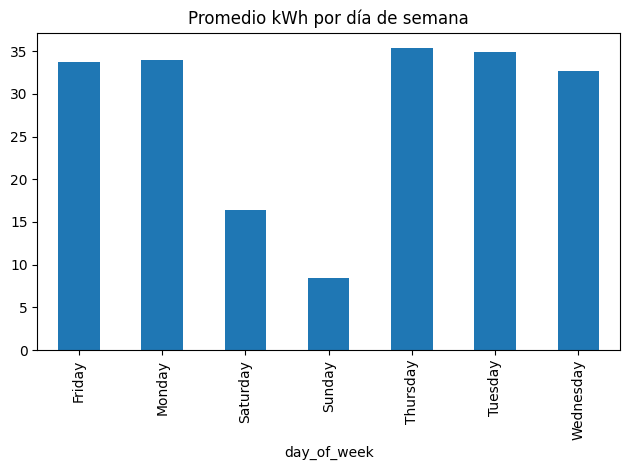

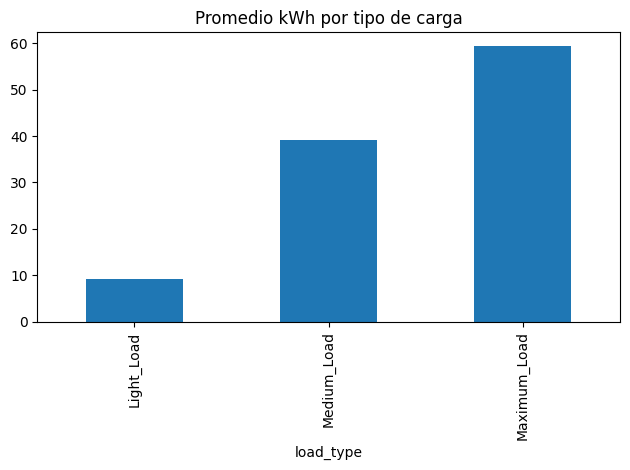

In [12]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt

base = df_full if 'df_full' in globals() else df_clean

# 1) Resumen por día y por hora
daily = base.groupby(pd.Grouper(key="date", freq="D"))["usage_kwh"].sum().to_frame("usage_kwh_day")
hourly = base.copy()
hourly["hour"] = hourly["date"].dt.hour
mean_by_hour = hourly.groupby("hour")["usage_kwh"].mean()
mean_by_dow  = base.groupby("day_of_week", observed=True)["usage_kwh"].mean()
mean_by_load = base.groupby("load_type", observed=True)["usage_kwh"].mean()

print("Media kWh por hora:\n", mean_by_hour.round(2))
print("\nMedia kWh por día de semana:\n", mean_by_dow.round(2))
print("\nMedia kWh por tipo de carga:\n", mean_by_load.round(2))

# 2) Correlaciones numéricas
numcols = base.select_dtypes(include=[np.number]).columns
corr = base[numcols].corr(method="spearman")
print("\nTop correlaciones con usage_kwh:")
print(corr["usage_kwh"].sort_values(ascending=False).head(8))

# 3) Gráficos simples (1 por figura)
plt.figure(); daily["usage_kwh_day"].plot(title="Uso diario (kWh)"); plt.tight_layout(); plt.show()
plt.figure(); mean_by_hour.plot(kind="bar", title="Promedio kWh por hora"); plt.tight_layout(); plt.show()
plt.figure(); mean_by_dow.plot(kind="bar", title="Promedio kWh por día de semana"); plt.tight_layout(); plt.show()
plt.figure(); mean_by_load.plot(kind="bar", title="Promedio kWh por tipo de carga"); plt.tight_layout(); plt.show()


## EDA visual y descriptivo
Con el dataset limpio (y, cuando corresponde, con cadencia 15’ continua), exploramos niveles, variabilidad, patrones temporales y relaciones entre variables.

**Patrón temporal y estacionalidad corta**

* Diario-horario: el consumo muestra un perfil diurno muy claro. Los promedios por hora se disparan desde ~08:00, alcanzan máximos entre 09:00–16:00, y descienden por la noche.

* Semanal: los días laborables presentan consumos muy superiores a fines de semana; domingo es el más bajo de la semana, seguido de sábado.

**Categorización operativa (load_type)**

* El consumo medio sigue el orden esperado: Maximum_Load > Medium_Load > Light_Load.
Como referencia, los promedios observados rondan ~9 kWh (Light), 39 kWh (Medium) y 59 kWh (Maximum) por intervalo de 15’.
* Los boxplots confirman distribuciones razonables, con colas controladas tras el capping.

**Relaciones entre variables**

* La correlación Spearman de usage_kwh con co2_tco2 es alta (≈ 0.85), coherente con una intensidad de emisiones relativamente estable.

* La energía reactiva lagging también se relaciona positivamente con el consumo (≈ 0.63), lo que sugiere cargas inductivas relevantes en los periodos de mayor actividad.

* nsm (segundos desde medianoche) capta correctamente el ciclo diario y, tras la limpieza, no introduce ruido.

**Distribuciones y calidad**

* Las distribuciones de usage_kwh y co2_tco2 presentan colas derechas (propias de actividad industrial con picos puntuales), suavizadas tras el IQR capping.

* El factor de emisión co2/usage es estable por mes (línea casi plana entre ~0.00045 y ~0.00047 t/kWh), lo que valida la estrategia de imputación basada en esa relación física.

**Series agregadas**

* El uso diario muestra variabilidad, con picos que coinciden con periodos de alta actividad; no obstante, la señal general es consistente y apta para modelado, sobre todo con la versión de grilla completa.

In [15]:
# ==== EDA ====
# import os, numpy as np, pandas as pd
# import matplotlib.pyplot as plt

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

BASE = df_full if 'df_full' in globals() else df_clean

OUTDIR = "reports_eda"
os.makedirs(OUTDIR, exist_ok=True)

# 1) Data quality (faltantes, tipos, únicos)
dq = []
for c in BASE.columns:
    s = BASE[c]
    dq.append({
        "column": c,
        "dtype": str(s.dtype),
        "n": len(s),
        "missing": int(s.isna().sum()),
        "pct_missing": round(100*s.isna().mean(), 3),
        "n_unique": int(s.nunique(dropna=True))
    })
dq = pd.DataFrame(dq).sort_values("pct_missing", ascending=False)
dq.to_csv(f"{OUTDIR}/01_data_quality.csv", index=False)

# 2) Resúmenes agregados útiles
# 2.1 Uso diario
daily = BASE.groupby(pd.Grouper(key="date", freq="D"))["usage_kwh"].sum().to_frame("usage_kwh_day")
daily.to_csv(f"{OUTDIR}/02_usage_daily.csv")

# 2.2 Promedios por hora / día de semana / tipo de carga
hourly = BASE.copy(); hourly["hour"] = hourly["date"].dt.hour
mean_by_hour = hourly.groupby("hour")["usage_kwh"].mean()
mean_by_dow  = BASE.groupby("day_of_week", observed=True)["usage_kwh"].mean()
mean_by_load = BASE.groupby("load_type", observed=True)["usage_kwh"].mean()
mean_by_hour.to_csv(f"{OUTDIR}/03_mean_usage_by_hour.csv")
mean_by_dow.to_csv(f"{OUTDIR}/04_mean_usage_by_dow.csv")
mean_by_load.to_csv(f"{OUTDIR}/05_mean_usage_by_load.csv")

# 3) Correlaciones (Spearman)
numcols = BASE.select_dtypes(include=[np.number]).columns.tolist()
corr = BASE[numcols].corr(method="spearman")
corr.to_csv(f"{OUTDIR}/06_corr_spearman.csv")

# 4) Factor de emisión CO2/usage por mes (mediana)
tmp = BASE[(BASE["usage_kwh"]>0) & (BASE["co2_tco2"]>0)].copy()
tmp["month"] = tmp["date"].dt.to_period("M")
em_month = (tmp["co2_tco2"]/tmp["usage_kwh"]).groupby(tmp["month"]).median().to_timestamp()
em_month.to_csv(f"{OUTDIR}/07_emission_factor_by_month.csv")

# 5) GRÁFICOS (matplotlib, uno por figura)
# 5.1 Uso diario
plt.figure()
daily["usage_kwh_day"].plot(title="Uso diario (kWh)")
plt.tight_layout(); plt.savefig(f"{OUTDIR}/A_daily_usage.png"); plt.close()

# 5.2 Promedio por hora
plt.figure()
mean_by_hour.plot(kind="bar", title="Promedio kWh por hora")
plt.tight_layout(); plt.savefig(f"{OUTDIR}/B_mean_by_hour.png"); plt.close()

# 5.3 Promedio por día de semana
plt.figure()
mean_by_dow.plot(kind="bar", title="Promedio kWh por día de semana")
plt.tight_layout(); plt.savefig(f"{OUTDIR}/C_mean_by_dow.png"); plt.close()

# 5.4 Promedio por tipo de carga
plt.figure()
mean_by_load.plot(kind="bar", title="Promedio kWh por tipo de carga")
plt.tight_layout(); plt.savefig(f"{OUTDIR}/D_mean_by_load.png"); plt.close()

# 5.5 Distribución de numéricas (histogramas)
for c in ["usage_kwh","co2_tco2","lagging_current_reactive_power_kvarh",
          "leading_current_reactive_power_kvarh",
          "lagging_current_power_factor","leading_current_power_factor"]:
    if c in BASE.columns:
        plt.figure()
        BASE[c].dropna().hist(bins=60)
        plt.title(f"Distribución {c}")
        plt.tight_layout(); plt.savefig(f"{OUTDIR}/E_dist_{c}.png"); plt.close()

# 5.6 Boxplot de usage por tipo de carga (sin outliers)
plt.figure()
BASE.boxplot(column="usage_kwh", by="load_type", showfliers=False)
plt.title("Usage_kWh por load_type (sin outliers)"); plt.suptitle("")
plt.tight_layout(); plt.savefig(f"{OUTDIR}/F_box_usage_by_load.png"); plt.close()

# 5.7 Heatmap simple de correlaciones
if len(numcols) > 1:
    plt.figure()
    im = plt.imshow(corr.values, aspect="auto")
    plt.xticks(range(len(numcols)), numcols, rotation=90)
    plt.yticks(range(len(numcols)), numcols)
    plt.title("Correlación Spearman (numéricas)")
    plt.colorbar(im)
    plt.tight_layout(); plt.savefig(f"{OUTDIR}/G_corr_heatmap.png"); plt.close()

# 5.8 Emission factor por mes
plt.figure()
em_month.plot(marker="o", title="Mediana CO2/usage por mes (t/kWh)")
plt.tight_layout(); plt.savefig(f"{OUTDIR}/H_emission_factor_by_month.png"); plt.close()

# 6) Resumen ejecutivo en texto
summary_lines = []
summary_lines.append(f"Registros analizados: {len(BASE):,}")
summary_lines.append(f"Rango temporal: {BASE['date'].min()}  →  {BASE['date'].max()}")
summary_lines.append(f"Correlación con usage_kwh (top 5): {corr['usage_kwh'].sort_values(ascending=False).head(6).to_dict()}")
summary_lines.append(f"Media kWh por hora (picos): {mean_by_hour.sort_values(ascending=False).head(5).round(2).to_dict()}")
summary_lines.append(f"Media kWh por día (alto→bajo): {mean_by_dow.sort_values(ascending=False).round(2).to_dict()}")
summary_lines.append(f"Media kWh por load_type: {mean_by_load.round(2).to_dict()}")
summary_lines.append(f"Mediana global CO2/usage (t/kWh): {float((tmp['co2_tco2']/tmp['usage_kwh']).median()):.6f}")
with open(f"{OUTDIR}/00_summary.txt","w",encoding="utf-8") as f:
    f.write("\n".join(summary_lines))

print("EDA listo. Archivos en:", OUTDIR)


EDA listo. Archivos en: reports_eda


<Figure size 640x480 with 0 Axes>

Mostrando vistas rápidas de los resultados generados en 'reports_eda/'

Data Quality (primeras filas):


,column,dtype,n,missing,pct_missing,n_unique
0,mixed_type_col_label,string,35040,28396,81.039,2
1,mixed_type_col_num,float64,35040,11871,33.878,1000
2,mixed_type_col,object,35040,5227,14.917,1002
3,week_status_raw,object,35040,2353,6.715,5
4,day_of_week_raw,object,35040,2332,6.655,15
5,load_type_raw,object,35040,2321,6.624,7
6,date,datetime64[ns],35040,0,0.000,35040
7,usage_kwh,float64,35040,0,0.000,3117
8,lagging_current_reactive_power_kvarh,float64,35040,0,0.000,1537
9,week_status,string,35040,0,0.000,2



Uso diario (primeras filas):


,usage_kwh_day
date,
2018-01-01,348.580
2018-01-02,3856.580
2018-01-03,3643.650
2018-01-04,4651.330
2018-01-05,4374.605


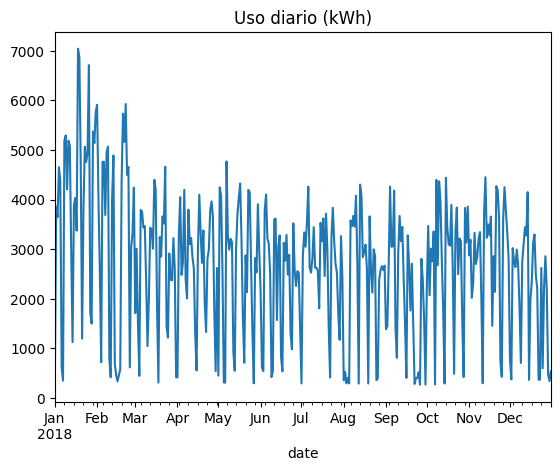


Promedio por hora:


,usage_kwh
hour,
0,8.562479
1,7.236342
2,5.261336
3,5.156034
4,5.675205


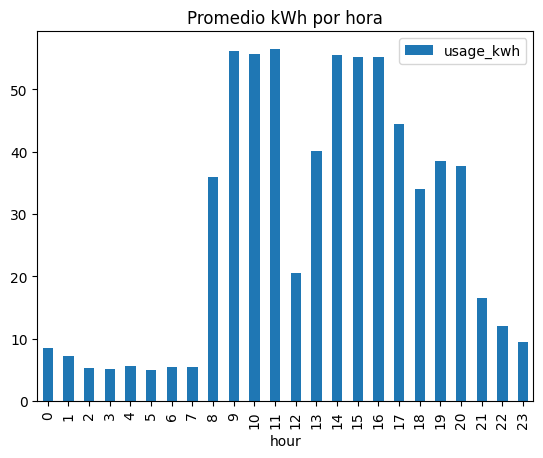


Promedio por día de semana:


,usage_kwh
day_of_week,
Friday,33.736443
Monday,33.942032
Saturday,16.431280
Sunday,8.382079
Thursday,35.376052


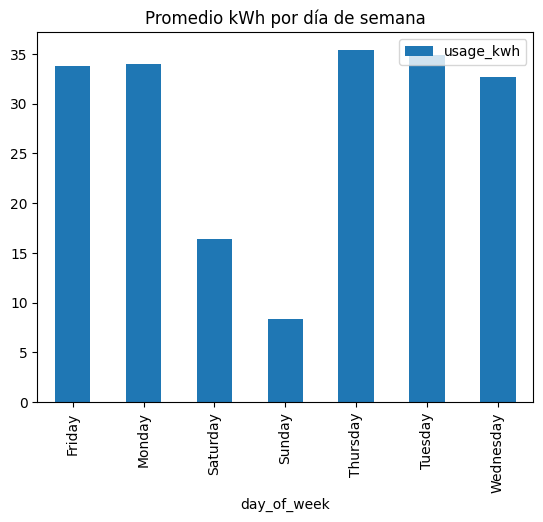


Promedio por tipo de carga:


,usage_kwh
load_type,
Light_Load,9.271352
Medium_Load,39.124177
Maximum_Load,59.409170


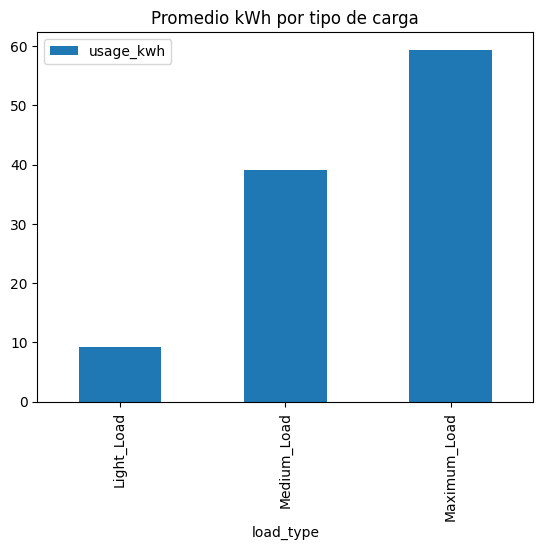


Matriz de correlaciones:


,usage_kwh,lagging_current_reactive_power_kvarh,leading_current_reactive_power_kvarh,co2_tco2,lagging_current_power_factor,leading_current_power_factor,nsm,mixed_type_col_num
usage_kwh,1.000000,0.628743,-0.137526,0.850983,0.385787,0.190750,0.328112,0.006850
lagging_current_reactive_power_kvarh,0.628743,1.000000,-0.685951,0.754667,-0.302435,0.716860,-0.048129,0.001290
leading_current_reactive_power_kvarh,-0.137526,-0.685951,1.000000,-0.270371,0.722149,-0.930730,0.391480,0.000416
co2_tco2,0.850983,0.754667,-0.270371,1.000000,0.261103,0.324375,0.270969,0.008825
lagging_current_power_factor,0.385787,-0.302435,0.722149,0.261103,1.000000,-0.696480,0.571779,0.007488
leading_current_power_factor,0.190750,0.716860,-0.930730,0.324375,-0.696480,1.000000,-0.370855,-0.000176
nsm,0.328112,-0.048129,0.391480,0.270969,0.571779,-0.370855,1.000000,-0.001367
mixed_type_col_num,0.006850,0.001290,0.000416,0.008825,0.007488,-0.000176,-0.001367,1.000000


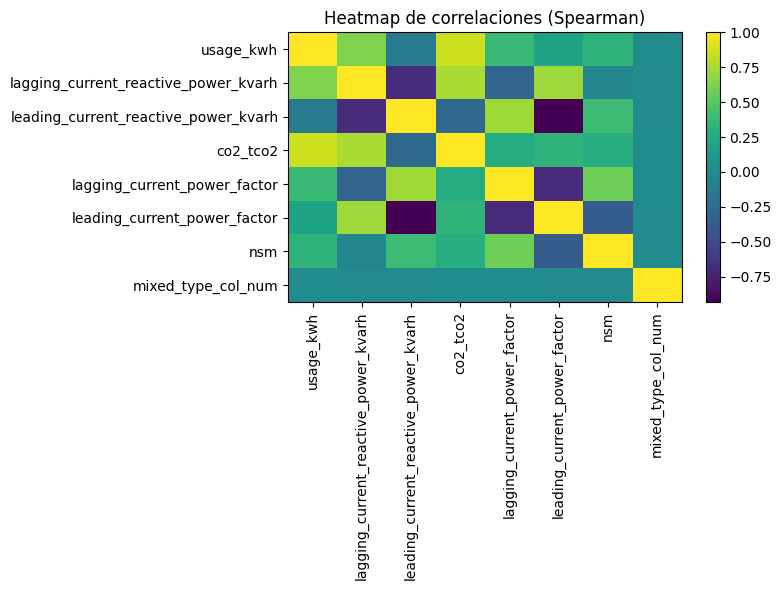


Factor de emisión CO2/usage por mes (mediana):


,0
month,
2018-01-01,0.000461
2018-02-01,0.000467
2018-03-01,0.000461
2018-04-01,0.000461
2018-05-01,0.000461


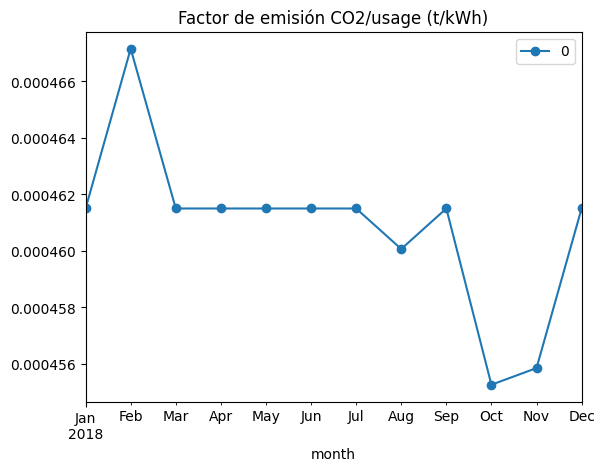

In [18]:
# === Mostrar resultados y vistas previas ===
import pandas as pd
import matplotlib.pyplot as plt

print("Mostrando vistas rápidas de los resultados generados en 'reports_eda/'")

# 1) Data Quality
dq = pd.read_csv("reports_eda/01_data_quality.csv")
print("\nData Quality (primeras filas):")
display(dq.head(10))

# 2) Uso diario
daily = pd.read_csv("reports_eda/02_usage_daily.csv", parse_dates=["date"], index_col="date")
print("\nUso diario (primeras filas):")
display(daily.head())

plt.figure()
daily["usage_kwh_day"].plot(title="Uso diario (kWh)")
plt.show()

# 3) Promedio por hora
mean_by_hour = pd.read_csv("reports_eda/03_mean_usage_by_hour.csv", index_col=0)
print("\nPromedio por hora:")
display(mean_by_hour.head())
mean_by_hour.plot(kind="bar", title="Promedio kWh por hora")
plt.show()

# 4) Promedio por día de semana
mean_by_dow = pd.read_csv("reports_eda/04_mean_usage_by_dow.csv", index_col=0)
print("\nPromedio por día de semana:")
display(mean_by_dow.head())
mean_by_dow.plot(kind="bar", title="Promedio kWh por día de semana")
plt.show()

# 5) Promedio por tipo de carga
mean_by_load = pd.read_csv("reports_eda/05_mean_usage_by_load.csv", index_col=0)
print("\nPromedio por tipo de carga:")
display(mean_by_load.head())
mean_by_load.plot(kind="bar", title="Promedio kWh por tipo de carga")
plt.show()

# 6) Correlaciones
corr = pd.read_csv("reports_eda/06_corr_spearman.csv", index_col=0)
print("\nMatriz de correlaciones:")
display(corr)

plt.figure(figsize=(8,6))
plt.imshow(corr.values, aspect="auto")
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title("Heatmap de correlaciones (Spearman)")
plt.colorbar()
plt.tight_layout()
plt.show()

# 7) Factor de emisión
em_month = pd.read_csv("reports_eda/07_emission_factor_by_month.csv", index_col=0, parse_dates=True)
print("\nFactor de emisión CO2/usage por mes (mediana):")
display(em_month.head())

em_month.plot(marker="o", title="Factor de emisión CO2/usage (t/kWh)")
plt.show()



In [19]:
import shutil
shutil.make_archive("EDA_Report", "zip", "reports_eda")


'/content/EDA_Report.zip'

## Conclusiones de la fase de limpieza de datos

* Dejamos un dataset limpio, consistente y documentado, con opciones:

    * steel_energy_clean.csv (malla irregular, sin huecos temporales).

    * steel_energy_clean_fullgrid.csv (malla 15’ continua).

* Las categóricas están normalizadas y coherentes; week_status se deriva de day_of_week para evitar contradicciones; load_type quedó sin nulos.

* Las reglas físicas se respetan (no negativos, factores de potencia [0–100], nsm consistente), y los outliers quedaron acotados de forma conservadora.

* El EDA confirma patrones operativos claros (diurno y laboral), alta relación entre consumo y CO₂, y estabilidad del factor de emisión, todo lo cual facilita la construcción de modelos robustos.

PREPARACIÓN DE DATOS

In [20]:
import pandas as pd

# --- Para Hugo ---
BASE = df_full.copy()

# --- Mapeo de Weekday / Weekend a 0 y 1 ---
status_map = {"Weekday": 0, "Weekend": 1}
BASE["day_status_num"] = BASE["week_status"].map(status_map).astype("Int8")

# --- (Opcional por si queres eliminar la versión categórica Hugo ---
# BASE.drop(columns=["week_status"], inplace=True)

# --- Orden de columnas ---
cols_first = ["date", "week_status", "day_status_num"]
cols_first = [c for c in cols_first if c in BASE.columns]
BASE = BASE[cols_first + [c for c in BASE.columns if c not in cols_first]]

# --- Guarda dataset final para modelado ---
nombre_archivo = "steel_energy_model_fullgrid.csv"
BASE.to_csv(nombre_archivo, index=False)

print("Dataset final para modelado guardado en:", nombre_archivo)
print("Filas:", len(BASE), " | Columnas:", len(BASE.columns))
print("Valores en day_status_num:", BASE['day_status_num'].value_counts(dropna=False).to_dict())



Dataset final para modelado guardado en: steel_energy_model_fullgrid.csv
Filas: 35040  | Columnas: 18
Valores en day_status_num: {np.int8(0): 25056, np.int8(1): 9984}


In [39]:
import os

OUT_PATH = "data/raw/steel_energy_model_fullgrid.csv"
BASE.to_csv(OUT_PATH, index=False)
print(f"Dataset guardado en {OUT_PATH}")

!ls -lh data/raw/


Dataset guardado en data/raw/steel_energy_model_fullgrid.csv
total 4.2M
-rw-r--r-- 1 root root 4.2M Oct 11 20:35 steel_energy_model_fullgrid.csv
-rw-r--r-- 1 root root  108 Oct 11 20:30 steel_energy_modified.csv.dvc


In [40]:
!dvc add -f data/raw/steel_energy_model_fullgrid.csv

⠋ Checking graph
Adding...:   0% 0/1 [00:00<?, ?file/s{'info': ''}]
!
          |0.00 [00:00,     ?file/s]
                                    
!
  0% |          |0/? [00:00<?,    ?files/s]
                                           
  0% 0/1 [00:00<?, ?file/s]
  0% 0/1 [00:00<?, ?file/s{'info': ''}]
                                       
  0% 0/1 [00:00<?, ?files/s]
  0% 0/1 [00:00<?, ?files/s{'info': ''}]
Adding...: 100% 1/1 [00:00<00:00, 18.28file/s{'info': ''}]

To track the changes with git, run:

	git add data/raw/steel_energy_model_fullgrid.csv.dvc data/raw/.gitignore

To enable auto staging, run:

	dvc config core.autostage true


In [41]:
!git add data/raw/steel_energy_model_fullgrid.csv.dvc .dvc .dvcignore
!git commit -m "DVC: nueva versión del dataset (steel_energy_model_fullgrid)"


[feat/eda 1ab6128] DVC: nueva versión del dataset (steel_energy_model_fullgrid)
 1 file changed, 5 insertions(+)
 create mode 100644 data/raw/steel_energy_model_fullgrid.csv.dvc
